# Titanic

## import library

In [81]:
# import all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## input Data
**teks tebal**

In [82]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Preprocessing Data

In [85]:
# Check missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [86]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [87]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [88]:
df = df.drop('Cabin', axis=1)

In [89]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [90]:
# check duplicate
df.duplicated().sum()

0

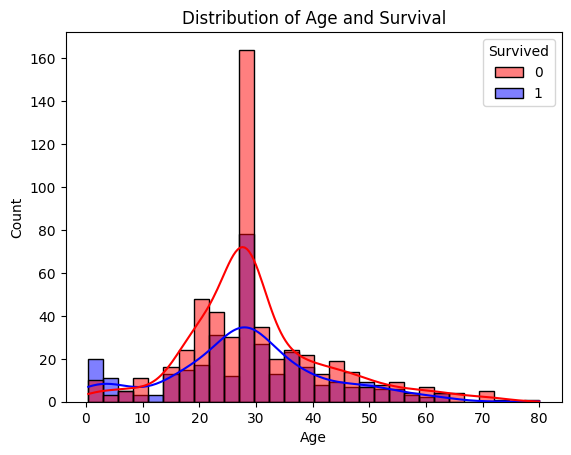

In [91]:
sns.histplot(x="Age", hue="Survived", data=df, kde=True, palette=["red", "blue"])
plt.title("Distribution of Age and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Distribution of Sex and survived')

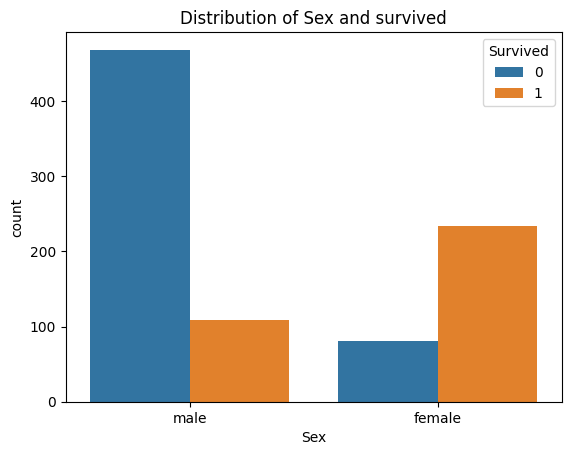

In [92]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Distribution of Sex and survived")

Text(0.5, 1.0, 'Distribution of Embarked and survived')

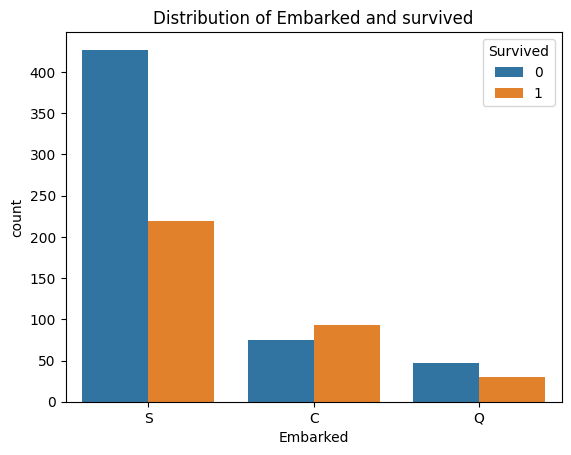

In [93]:
sns.countplot(x="Embarked",hue="Survived",data=df)
plt.title("Distribution of Embarked and survived")

In [94]:
df.groupby("Embarked",as_index=False)["Survived"].value_counts()

,Embarked,Survived,count
0,C,1,93
1,C,0,75
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,219


Text(0.5, 1.0, 'Passengers Survived according to their Pclass.')

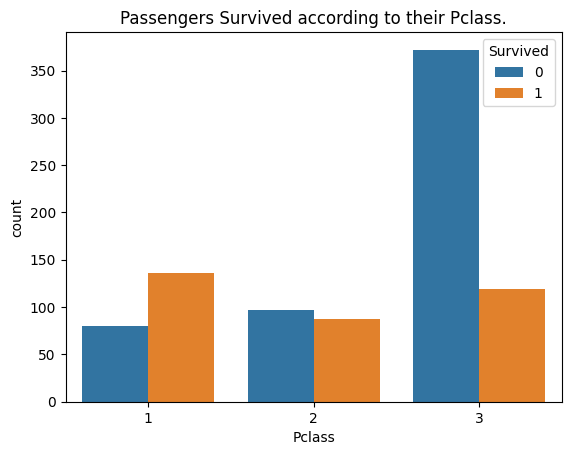

In [95]:
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.title("Passengers Survived according to their Pclass.")

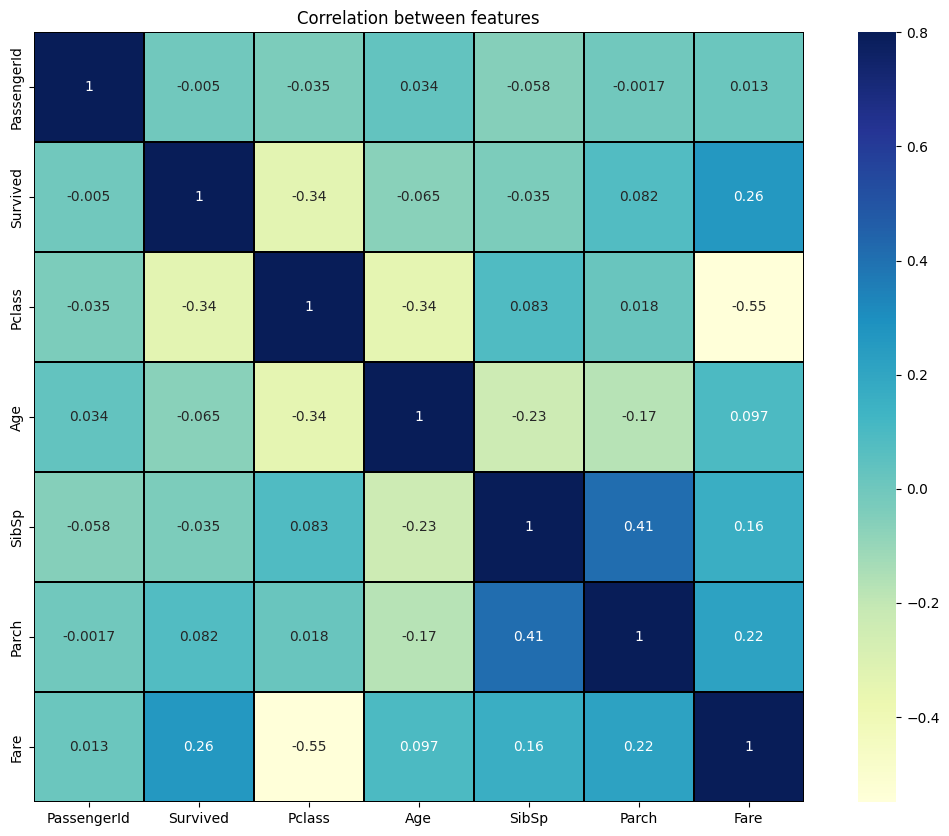

In [96]:
numeric_features = df.select_dtypes(include=['number']).columns
corr = df[numeric_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

##Feature Engineering
### Label Encoder untuk mengubah data kategorik menjadi numerik

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [100]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [101]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [102]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Train Test Split, Memisahkan data untuk dilatih dan diuji

In [103]:
from sklearn.model_selection import train_test_split
# train : test = 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [104]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [105]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


### Data test

In [106]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [107]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


## Modeling

### Membangun classification model menggunakan Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# buat model random forest
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
# melatih model
rf_ent.fit(X_train, y_train)
# prediksi data testing
y_pred_rfe = rf_ent.predict(X_test)

# Evaluasi model
print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 0.98
Test set score: 0.82
Accuracy Score: 0.82
Confusion Matrix: 
 [[91 14]
 [18 56]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



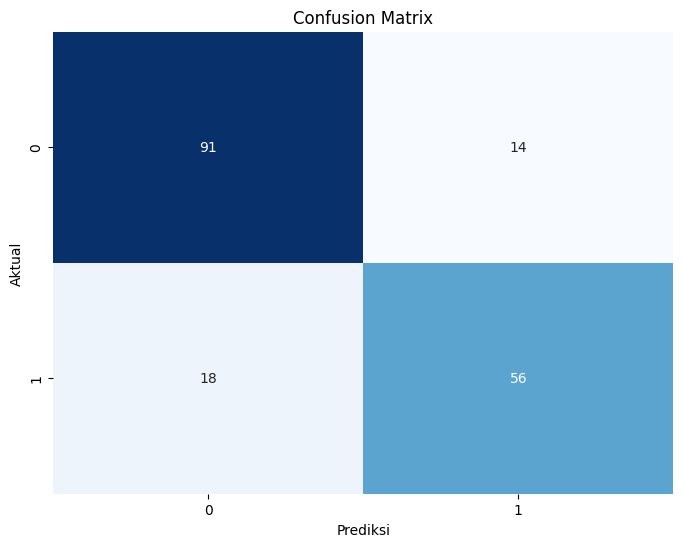

In [109]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_rfe)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Membangun classification model menggunakan Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

# buat model logistic regression
lr = LogisticRegression()
# latih model
lr.fit(X_train, y_train)
# prediksi data testing
y_pred_lr = lr.predict(X_test)

# Evaluasi Model
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 0.80 

Test set score: 0.81 

Accuracy Score: 0.81 

Confusion Matrix: 
 [[90 15]
 [19 55]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



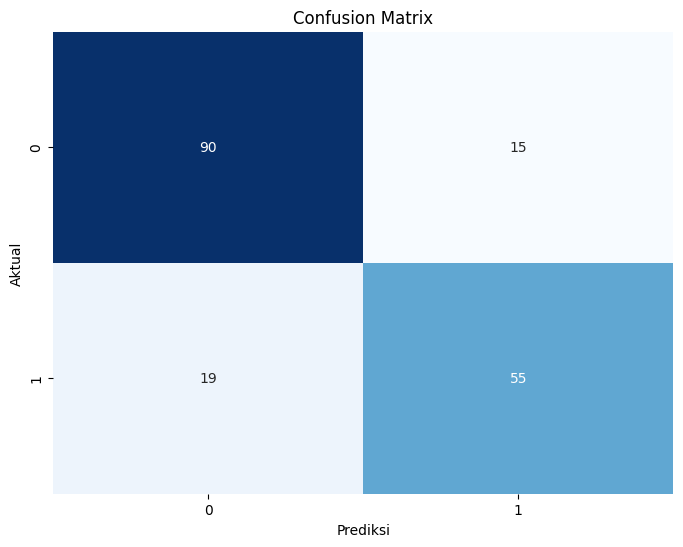

In [111]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Membangun classification model menggunakan K-Nearest Neighbors

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model dengan data training
knn.fit(X_train, y_train)

# Prediksi data testing
y_pred_knn = knn.predict(X_test)

# Evaluasi Model
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))

Training set score: 0.79
Test set score: 0.70
Accuracy Score: 0.70
Confusion Matrix: 
 [[87 18]
 [35 39]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



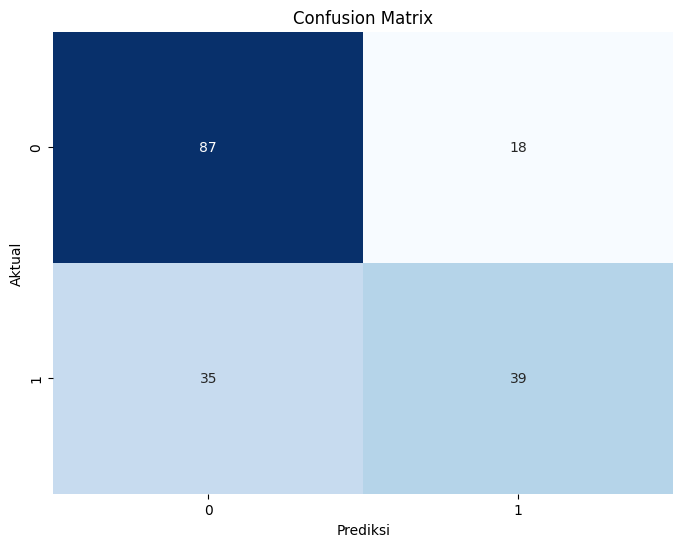

In [113]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Membangun classification model menggunakan XGBoost (n_estimators=500)

In [114]:
import xgboost as xgb

# buat model XGBoost (n_estimator=500)
xgb = xgb.XGBClassifier(n_estimators= 500)
# latih model
xgb.fit(X_train,y_train)
# prediksi data testing
y_pred_xgb = xgb.predict(X_test)

# Evaluasi Model
print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training set score: 0.98
Test set score: 0.79
Accuracy Score: 0.79
Confusion Matrix: 
 [[85 20]
 [17 57]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



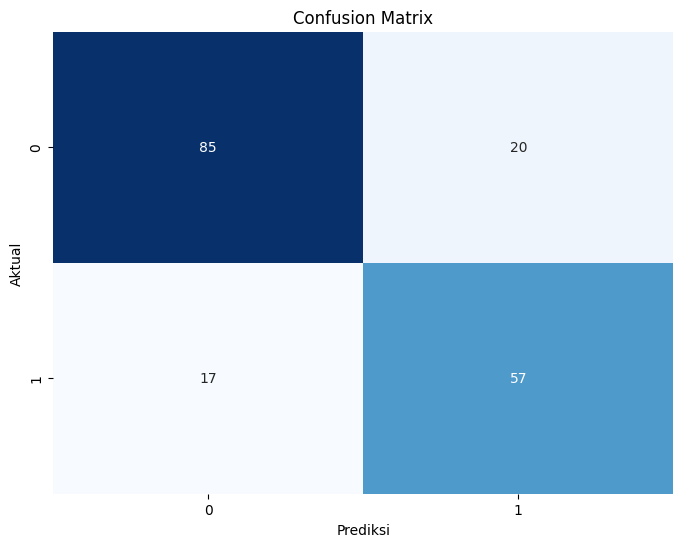

In [115]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

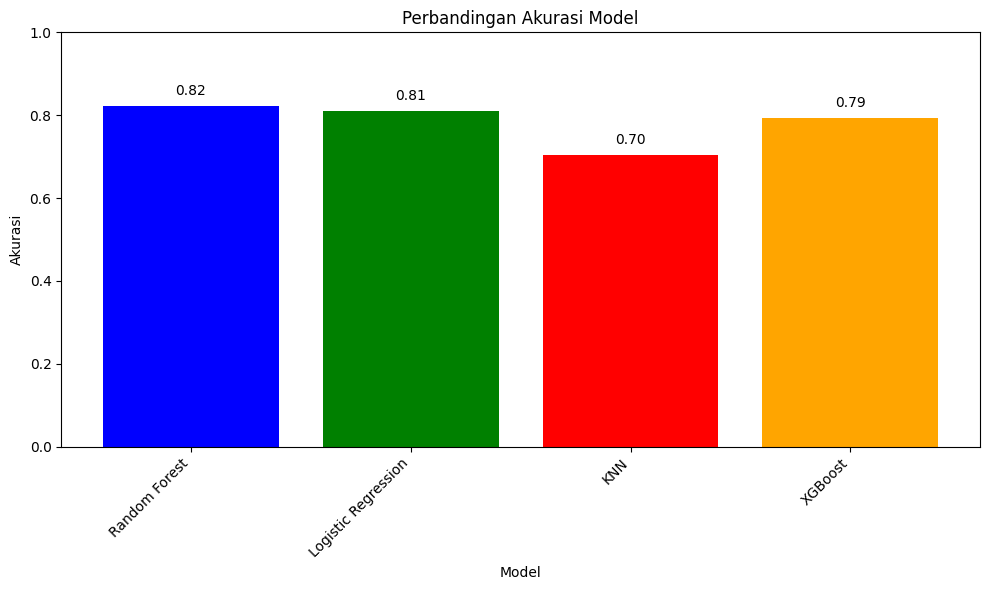

In [116]:
# Data akurasi dari setiap model
model_names = ['Random Forest', 'Logistic Regression', 'KNN', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_rfe),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_xgb)]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Set batas sumbu y antara 0 dan 1
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca

# Menampilkan nilai akurasi di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Feature importances

In [122]:
# Assuming you want to use the RandomForestClassifier for feature importance:
from sklearn.ensemble import RandomForestClassifier
model=  rf_ent
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,Fare,0.272493
1,Sex,0.271352
2,Age,0.254136
0,Pclass,0.082257
3,SibSp,0.050064
4,Parch,0.036217
6,Embarked,0.033481


## KESIMPULAN

- Dari total penumpang, sekitar 38% berhasil bertahan hidup, sementara sisanya tidak selamat
- Melihat fitur mana yang paling berpengaruh dalam prediksi model.

- Berdasarkan hasil evaluasi, model Random Forest menunjukkan kinerja terbaik dalam mengklasifikasikan data, diikuti oleh Logistic Regression. Model KNN dan XGBoost, meskipun memiliki potensi, belum mampu mengungguli kedua model tersebut dalam kasus ini
